## Setup

In [212]:
library(tidyverse)
data_dir = "../data/"
output_dir = "../output/"

## Load Data

In [213]:
data = read_csv(paste(data_dir, "quantile_normalized_data.csv", sep=""))
head(data)

Parsed with column specification:
cols(
  .default = col_double(),
  Case_ID = col_character(),
  Sample_Status = col_character()
)
See spec(...) for full column specifications.


A1BG,AAK1,AARS,ABCF1,ABCF3,ABI1,ABL2,ABT1,ACAT2,ACPP,...,ZNHIT3,ZNRD1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN21,ZSCAN26,ZSCAN9,Case_ID,Sample_Status
68.33067,122.1374,77.78989,117.0266,116.5594,129.5168,90.61702,86.48138,119.25089,98.35239,...,74.47961,106.20745,82.23404,87.98582,60.32092,84.51418,108.3307,117.87057,Case028336,ACPA_positive
83.68262,105.0257,98.80585,113.7531,203.5727,187.2979,86.39982,65.45745,78.47429,79.94592,...,58.25975,96.01463,60.59220,113.75310,83.68262,87.59530,106.8360,97.91002,Case028397,ACPA_positive
86.99645,111.5239,100.63519,132.9246,137.6152,230.6259,99.29699,75.75355,84.41046,79.42243,...,57.43883,99.29699,72.00133,118.22074,79.42243,99.29699,109.5541,105.68218,Ctrl028355,control
85.91312,116.2881,97.37323,135.5120,156.6512,178.7748,94.38830,76.68174,94.38830,71.90248,...,57.57270,113.92021,77.74113,117.56294,90.51020,89.25266,105.9304,126.01330,Case028301,ACPA_negative
93.52172,111.9823,99.16223,139.4118,149.7323,173.4388,93.52172,78.39096,91.73936,73.34796,...,58.74823,110.13209,74.77349,103.11879,96.51330,375.30319,106.4761,110.76064,Case028326,ACPA_positive
78.73005,125.1613,96.63830,141.1848,139.7314,174.7420,106.81782,72.44681,97.32890,83.26241,...,62.01906,118.44326,119.02305,92.40293,71.87012,85.94415,109.1002,112.11791,Case028323,ACPA_positive


## Extract X and y

In [214]:
n = dim(data)[2] - 2
X = data[, 1:n]
head(X)

A1BG,AAK1,AARS,ABCF1,ABCF3,ABI1,ABL2,ABT1,ACAT2,ACPP,...,ZNF645,ZNF70,ZNHIT3,ZNRD1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN21,ZSCAN26,ZSCAN9
68.33067,122.1374,77.78989,117.0266,116.5594,129.5168,90.61702,86.48138,119.25089,98.35239,...,91.01241,124.51596,74.47961,106.20745,82.23404,87.98582,60.32092,84.51418,108.3307,117.87057
83.68262,105.0257,98.80585,113.7531,203.5727,187.2979,86.39982,65.45745,78.47429,79.94592,...,76.35372,74.56472,58.25975,96.01463,60.59220,113.75310,83.68262,87.59530,106.8360,97.91002
86.99645,111.5239,100.63519,132.9246,137.6152,230.6259,99.29699,75.75355,84.41046,79.42243,...,84.41046,85.07890,57.43883,99.29699,72.00133,118.22074,79.42243,99.29699,109.5541,105.68218
85.91312,116.2881,97.37323,135.5120,156.6512,178.7748,94.38830,76.68174,94.38830,71.90248,...,83.36348,91.82358,57.57270,113.92021,77.74113,117.56294,90.51020,89.25266,105.9304,126.01330
93.52172,111.9823,99.16223,139.4118,149.7323,173.4388,93.52172,78.39096,91.73936,73.34796,...,90.36436,89.77571,58.74823,110.13209,74.77349,103.11879,96.51330,375.30319,106.4761,110.76064
78.73005,125.1613,96.63830,141.1848,139.7314,174.7420,106.81782,72.44681,97.32890,83.26241,...,90.57624,90.57624,62.01906,118.44326,119.02305,92.40293,71.87012,85.94415,109.1002,112.11791


In [215]:
y = data[,n + 2]
head(y)

Sample_Status
ACPA_positive
ACPA_positive
control
ACPA_negative
ACPA_positive
ACPA_positive


## Principal Component Analysis

In [216]:
pca = prcomp(x = X, center = TRUE, scale. = TRUE)
principal_components = pca$x
head(principal_components)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94
-15.85306,-17.1917105,-13.2272773,10.678732,-13.220356,18.1864846,-1.6606676,19.2496913,-5.109491,3.7008883,...,-0.5795492,-0.9127710,1.05326308,-0.29300960,-0.26465435,0.4098598,-0.27413022,0.45779286,-0.07808694,-1.246225e-14
10.76044,1.5333204,21.3555187,7.345822,2.546781,-4.7465416,-2.5743179,-0.1317749,3.522536,3.1956740,...,1.0337050,-0.2253726,-0.47489586,0.30019269,0.67755758,0.3039560,-0.32736324,0.22905039,-0.04246049,-1.157408e-14
11.09733,-0.6905994,-2.2318503,-5.115045,2.020124,0.5703668,-0.9864835,-2.9991382,3.268270,-2.0788413,...,-0.4672607,-0.1386696,-1.30087474,-0.72638629,0.48368089,-0.7780320,0.28805531,-0.60771838,-0.61144357,-1.043610e-14
14.34915,-3.1548587,-0.8818904,-6.632213,3.052806,-1.9209162,2.6759015,-4.1909818,5.604242,1.8986536,...,1.8717374,2.4411672,0.83359676,0.76655895,-0.01044618,0.6673938,-1.23553702,0.68924056,-0.11982653,-1.301736e-14
13.21576,2.0373029,-5.0423256,-7.304086,3.293841,-0.6158617,1.4007260,-3.8835046,6.718117,0.7179235,...,0.6366833,-0.1944404,-1.15261529,-0.33973572,-0.12379690,-0.6954582,-0.64176656,-0.38737315,-0.62864863,-1.479372e-14
9.84028,-5.1135730,-13.5298734,2.685334,-0.581006,5.4706203,-1.2356241,-0.9041791,3.703835,-2.9714181,...,-1.7325214,-0.8568944,-0.04544462,0.03190486,-0.68019588,-0.2139661,-0.04973936,-0.05927433,-0.19584405,-1.035283e-14


In [217]:
# Calculate explained variance

# https://stats.stackexchange.com/questions/254592/calculating-pca-variance-explained
eigs <- pca$sdev^2
explained1 = round((eigs[1] / sum(eigs)) * 100, 1)
explained2 = round((eigs[2] / sum(eigs)) * 100, 1)

## Plot Results

In [218]:
df = as.data.frame(principal_components)
df['Sample_Status'] = y

pdf 
  2

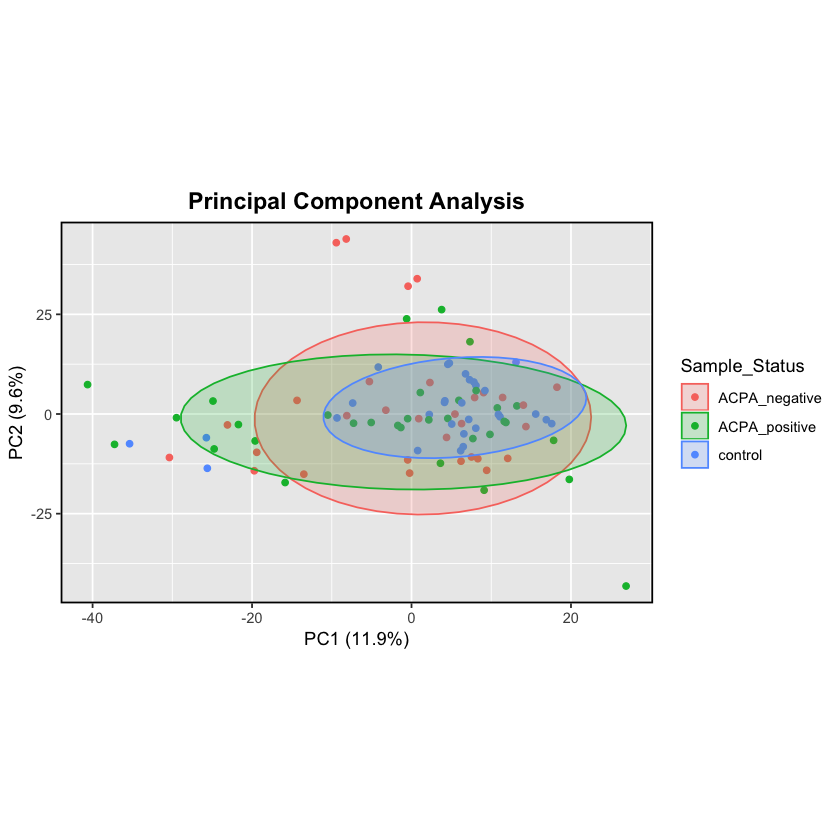

In [220]:
png(paste(output_dir, "PCA.png", sep=""), units="in", width=6, height=5, res=300)
    g = ggplot(df, aes(x = PC1, y = PC2, color=Sample_Status)) + 
        geom_point() +
        ggtitle("Principal Component Analysis") + 
        theme(plot.title = element_text(hjust = 0.5, size=14, face="bold"), 
             panel.border = element_rect(colour = "black", fill=NA, size=1)) + 
        stat_ellipse(geom='Polygon', level = 0.85, alpha = 0.2, aes(fill = Sample_Status)) + 
        coord_fixed(0.5) + 
        xlab(paste("PC1", " (", explained1, "%)", sep="") ) +
        ylab(paste("PC2", " (", explained2, "%)", sep=""))
dev.off()
print(g)

## Multidimensional Scaling

In [221]:
METRIC = "manhattan"

# calculate distances with METRIC
distances = dist(scale(X, center=TRUE, scale=TRUE),
  method=METRIC)

# Multidimensional scaling: 2 dimensions
mds = cmdscale(distances, eig=TRUE, x.ret=TRUE)

# extract points
mds_plot = data.frame(mds$points)
names(mds_plot) = c('MDS1', 'MDS2')
head(mds_plot)

# calculate explained variances
explained_variances = round(mds$eig/sum(mds$eig)*100, 1)
explained1 = explained_variances[1]
explained2 = explained_variances[2]

MDS1,MDS2
527.9857,506.787596
-382.3283,-46.918615
-365.1278,7.798705
-433.1018,106.282763
-414.0903,-73.598253
-288.9485,176.337725


## Plot Results

In [222]:
df = as.data.frame(mds_plot)
df['Sample_Status'] = y
head(df)

MDS1,MDS2,Sample_Status
527.9857,506.787596,ACPA_positive
-382.3283,-46.918615,ACPA_positive
-365.1278,7.798705,control
-433.1018,106.282763,ACPA_negative
-414.0903,-73.598253,ACPA_positive
-288.9485,176.337725,ACPA_positive


pdf 
  2

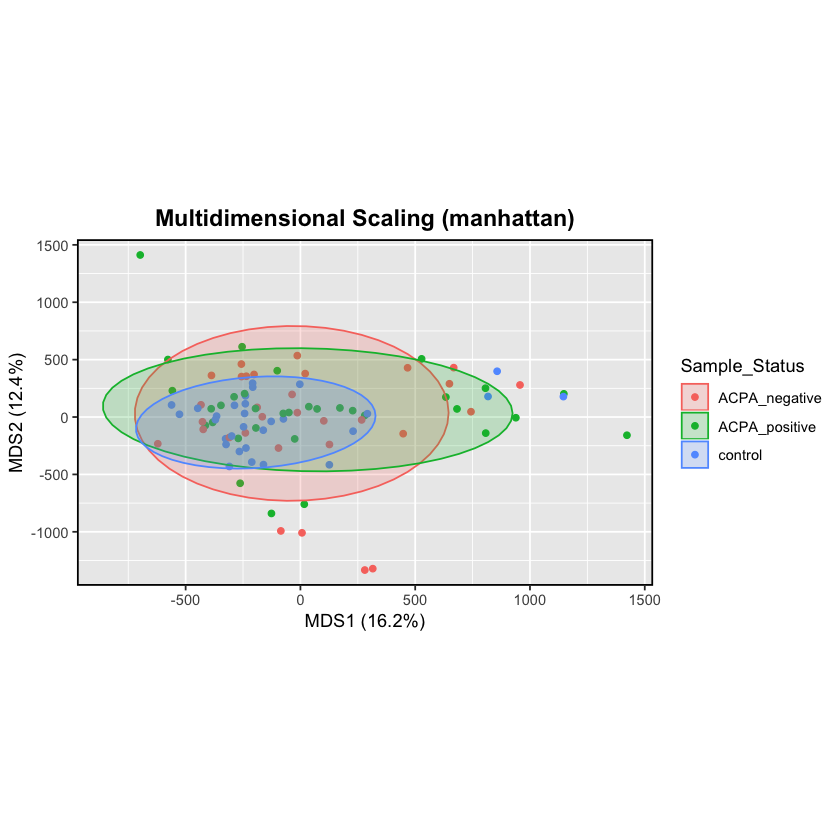

In [225]:
png(paste(output_dir, "MDS.png", sep=""), units="in", width=6, height=5, res=300)
    g = ggplot(df, aes(x = MDS1, y = MDS2, color=Sample_Status)) + 
        geom_point() +
        ggtitle(paste("Multidimensional Scaling ", "(", (METRIC), ")", sep="")) + 
        theme(plot.title = element_text(hjust = 0.5, size=14, face="bold"), 
             panel.border = element_rect(colour = "black", fill=NA, size=1)) + 
        stat_ellipse(geom='Polygon', level = 0.85, alpha = 0.2, aes(fill = Sample_Status)) + 
        coord_fixed(0.5) + 
        xlab(paste("MDS1", " (", explained1, "%)", sep="") ) +
        ylab(paste("MDS2", " (", explained2, "%)", sep=""))
dev.off()
print(g)